In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(True)

import re
import functools

In [3]:
df = pd.read_csv('data/train.csv')
df.shape

(891, 12)

In [4]:
print(len(df))
len(df) - len(df[df['Survived']==1])

891


549

In [5]:
# pclass is incorrect ordering and I'm not sure about how ordered categorical they are
# lets do some dummy variable encoding

# df.loc[:, 'FirstClass'] = list(map(lambda x: True if x == 3 else False, list(df['Pclass'])))
# df.loc[:, 'SecondClass'] = list(map(lambda x: True if x == 2 else False, list(df['Pclass'])))
# df.loc[:, 'ThirdClass'] = list(map(lambda x: True if x == 1 else False, list(df['Pclass'])))

# df = df.drop('Pclass', axis=1)

# lets try ordered categorical approach with heavy weighting

def f(x):
    if x == 1:
        return 2
    if x == 2:
        return 1
    if x == 3:
        return 0

df.loc[:, 'Pclass'] = list(map(f, list(df['Pclass'])))

In [6]:
def f(sex):
    return 1 if sex == 'female' else 0
df.loc[:, 'Sex'] = list(map(f, list(df['Sex'])))

In [7]:
df['Cabin'].unique()
# looks like CLASS+NUMBER; we can extract out the class, I'm not sure what the multiple cabins are though

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
multiple_cabins = df[list(map(lambda x: True if ' ' in str(x) else False, list(df['Cabin'])))]
multiple_cabins.shape

(24, 12)

In [9]:
# maybe I should extract out the name for ease of use
import re

regex = r'([\w ]+), (\w+). ([\w\(\), ]+)'
for row in df.iterrows():
    index = row[0]
    data = row[1]
    search_obj = re.search(regex, data['Name'])
    df.loc[index, 'LastName'] = search_obj[1].strip()
    df.loc[index, 'Salutation'] = search_obj[2].strip()
    df.loc[index, 'CommonName'] = search_obj[3].strip()
    
df[['Name', 'LastName', 'Salutation', 'CommonName']]
# all of the names look really British / American, with a little nordic-ish (?) mixed in...
# maybe I should see how many of them are British; it might have been a cultural thing to give up for other people
# same thing for American, idk if I have enough for other races

,Name,LastName,Salutation,CommonName
0,"Braund, Mr. Owen Harris",Braund,Mr,Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,"Heikkinen, Miss. Laina",Heikkinen,Miss,Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,"Allen, Mr. William Henry",Allen,Mr,William Henry
5,"Moran, Mr. James",Moran,Mr,James
6,"McCarthy, Mr. Timothy J",McCarthy,Mr,Timothy J
7,"Palsson, Master. Gosta Leonard",Palsson,Master,Gosta Leonard
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg)
9,"Nasser, Mrs. Nicholas (Adele Achem)",Nasser,Mrs,Nicholas (Adele Achem)


In [10]:
# how many missing values do we have? Where are they?

for col in df.columns:
    print(col)
    print(len(df) - len(df[df[col].isnull()]))
    print()
    
# the vast majority is cabin; we could impute Age with some sort of regression

PassengerId
891

Survived
891

Pclass
891

Name
891

Sex
891

Age
714

SibSp
891

Parch
891

Ticket
891

Fare
891

Cabin
204

Embarked
889

LastName
891

Salutation
891

CommonName
891



In [11]:
# lets do some feature engineering on ticket numbers
df.head()['Ticket']

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [12]:
# so it seems like we have ticketType and ticketNumber
for row in df.iterrows():
    index = row[0]
    data = row[1]
    ticket_values = data['Ticket'].split()
    df.loc[index, 'TicketNumber'] = ticket_values[-1]
    if len(ticket_values) == 2:
        df.loc[index, 'TicketPrefix'] = ticket_values[0]
        
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Salutation,CommonName,TicketNumber,TicketPrefix
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,21171,A/5
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),17599,PC
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,3101282,STON/O2.
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),113803,NaN
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,373450,NaN
5,6,0,0,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,330877,NaN
6,7,0,2,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,17463,NaN
7,8,0,0,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master,Gosta Leonard,349909,NaN
8,9,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg),347742,NaN
9,10,1,1,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs,Nicholas (Adele Achem),237736,NaN


In [13]:
# remember this is _not_ a full titanic dataset; nothing more can probably be gleamed usefully from parch or sibsp

# lets take a look at the distribution of both variables and see how noisy it is

trace0 = go.Histogram(y=df['Parch'], opacity=0.5)
trace1 = go.Histogram(y=df['SibSp'], opacity=0.5)
trace2 = go.Histogram(y=df['Parch']+df['SibSp'], opacity=0.5)
data = [trace0, trace1, trace2]

layout = go.Layout(barmode='stack')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [14]:
# lets take it
df.loc[:, 'NumRelatives'] = df['Parch'] + df['SibSp']

In [15]:
df.loc[:, 'HasFamily'] = list(map(lambda x: True if x > 0 else False, list(df['NumRelatives'])))

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Salutation,CommonName,TicketNumber,TicketPrefix,NumRelatives,HasFamily
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,21171,A/5,1,True
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),17599,PC,1,True
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,3101282,STON/O2.,0,False
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),113803,NaN,1,True
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,373450,NaN,0,False


In [17]:
# lets do age imputation; lets take a look at the histogram for age to get an idea of what the population looks like
# if we can visually "match" the histograms we can probably attribute the probability functions are the same,
    # which would imply that they are from the same sample space
trace0 = go.Histogram(x=df['Age'])
data = [trace0]
layout = go.Layout(title='Distribution of Age')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [18]:
# maybe bins might be more effective as opposed to 

In [19]:
# so, it seems to be a bimodal distribution centered near the beginning and a more dominant one near the center
# lets take a look at the missing ages, see if I can heuristically start identifying anything
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Salutation,CommonName,TicketNumber,TicketPrefix,NumRelatives,HasFamily
5,6,0,0,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James,330877,NaN,0,False
17,18,1,1,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S,Williams,Mr,Charles Eugene,244373,NaN,0,False
19,20,1,0,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs,Fatima,2649,NaN,0,False
26,27,0,0,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C,Emir,Mr,Farred Chehab,2631,NaN,0,False
28,29,1,0,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q,Dwyer,Miss,Ellen,330959,NaN,0,False
29,30,0,0,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,NaN,S,Todoroff,Mr,Lalio,349216,NaN,0,False
31,32,1,2,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,C,Spencer,Mrs,William Augustus (Marie Eugenie),17569,PC,1,True
32,33,1,0,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,NaN,Q,Glynn,Miss,Mary Agatha,335677,NaN,0,False
36,37,1,0,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,NaN,C,Mamee,Mr,Hanna,2677,NaN,0,False
42,43,0,0,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,NaN,C,Kraeff,Mr,Theodor,349253,NaN,0,False


In [20]:
# interesting stackexchange thread on normality testing
# https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless
# maybe I should wait on this until I get to CLT?

In [21]:
# helper occurance features
def build_occurance_feature(column_name):
    occurance = df.groupby(column_name).size()
    amap = {}
    for ind in occurance.index:
        amap[ind] = occurance[ind]
    df.loc[:, column_name+'Occurance'] = df[column_name].apply(lambda x: amap[x])
    
build_occurance_feature('LastName')
build_occurance_feature('Ticket')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,LastName,Salutation,CommonName,TicketNumber,TicketPrefix,NumRelatives,HasFamily,LastNameOccurance,TicketOccurance
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,S,Braund,Mr,Owen Harris,21171,A/5,1,True,2,1
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),17599,PC,1,True,1,1
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Heikkinen,Miss,Laina,3101282,STON/O2.,0,False,1,1
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),113803,NaN,1,True,2,2
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,S,Allen,Mr,William Henry,373450,NaN,0,False,2,1
5,6,0,0,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,...,Q,Moran,Mr,James,330877,NaN,0,False,3,1
6,7,0,2,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,...,S,McCarthy,Mr,Timothy J,17463,NaN,0,False,1,1
7,8,0,0,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,...,S,Palsson,Master,Gosta Leonard,349909,NaN,4,True,4,4
8,9,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,...,S,Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg),347742,NaN,2,True,6,3
9,10,1,1,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,...,C,Nasser,Mrs,Nicholas (Adele Achem),237736,NaN,1,True,2,2


In [22]:
# so apparently from googling around, the cabin letter is which deck, and the number is the cabin number

regex = r'(\w)(\d+)'
backup_regex = r'(\w)'

for row in df.iterrows():
    if not pd.isnull(row[1]['Cabin']):
        search_obj = re.search(regex, row[1]['Cabin'])
        try:
            df.loc[row[0], 'CabinDeck'] = search_obj[1] 
            df.loc[row[0], 'CabinNumber'] = search_obj[2]
        except:
            backup_search = re.search(backup_regex, row[1]['Cabin'])
            df.loc[row[0], 'CabinDeck'] = backup_search[1]

df[['Cabin', 'CabinDeck', 'CabinNumber']].head(20)

,Cabin,CabinDeck,CabinNumber
0,NaN,NaN,NaN
1,C85,C,85
2,NaN,NaN,NaN
3,C123,C,123
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,E46,E,46
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [23]:
# we are almost ready; just have to do dummification
# NOTE: Maybe there's value in letting the tree interpret 'female' : 1 > 'male' : 0, since there's inherrent order
# Same for class, if we multiply by -1
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LastName',
       'Salutation', 'CommonName', 'TicketNumber', 'TicketPrefix',
       'NumRelatives', 'HasFamily', 'LastNameOccurance', 'TicketOccurance',
       'CabinDeck', 'CabinNumber'],
      dtype='object')

In [24]:
df[['Name', 'LastName', 'CommonName']].to_csv('name_information.csv', index=False)

In [25]:
# maybe name length/structure gives more information about class or prestige
#df.loc[:, 'NameLength'] = list(map(lambda astr: len(astr), list(df['Name'])))
#jdf.loc[:, 'NameTokenLength'] = list(map(lambda astr: len(astr.split()), list(df['Name'])))

In [26]:
import pickle as pkl

brit_map = pkl.load(open('name_isBritish_map.pkl', 'rb'))
df.loc[:, 'IsBritish'] = list(map(lambda x: brit_map[x], list(df['Name'])))
df.head()[['Name', 'IsBritish']]

,Name,IsBritish
0,"Braund, Mr. Owen Harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
4,"Allen, Mr. William Henry",1


In [27]:
df = df.drop(['Name', 'LastName', 'CommonName'], axis=1)  # probably the only useful thing is salutation
# actually maybe not, there might be merit in mapping the person to their country of origin
# via LastName to account for any differences by race, which this dataset wouldn't explain

# If there is enough data, we may be able to segment the dataset based on CountryOfOrigin and build models on that

In [28]:
# lets encode CabinDeck
#df['CabinDeck'].value_counts()

df['TransformedCabinDeck'] = df['CabinDeck'].apply(lambda x: ord(x) if not pd.isnull(x) else np.nan)
df['TransformedCabinDeck'] -= min(df['TransformedCabinDeck'].dropna())

In [29]:
df['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
      dtype=object)

In [30]:
df.where(df['Salutation'] == 'Sir').dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,TicketNumber,TicketPrefix,NumRelatives,HasFamily,LastNameOccurance,TicketOccurance,CabinDeck,CabinNumber,IsBritish,TransformedCabinDeck
599,600.0,1.0,2.0,0.0,49.0,1.0,0.0,PC 17485,56.9292,A20,...,17485,PC,1.0,1.0,2.0,2.0,A,20,0.0,0.0


In [31]:
# lets encode the salutation
# lets encode the embarked with the ordering Mrs > Miss > Mr > Noise

def salu_map(x):
    if pd.isnull(x):
        return np.nan
    elif x == 'Mrs':
        return 3
    elif x == 'Miss' or x == 'Mlle':
        return 2
    elif x == 'Master' or x == 'Sir' or x == 'Dr':
        return 1
    elif x == 'Capt':
        return -1  # captain goes down with the ship!
    else:
        return 0
    
df.loc[:, 'Salutation'] = list(map(salu_map, list(df['Salutation'])))
df['Salutation'].unique()

array([ 0,  3,  2,  1, -1])

In [32]:
# https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic#Survivors_and_victims
# some people who boarded at Southamption got off at Cherbourg or Queenstown

embark_map = {
    'S': 'Southamption',
    'Q': 'Queenstown',
    'C': 'Cherbourg'
}

for key in embark_map:
    df.loc[:, 'BoardedAt'+embark_map[key]] = list(map(lambda x: 1 if x == key else 0, list(df['Embarked'])))

df = df.drop('Embarked', axis=1)

In [33]:
survived_women = list(filter(
        lambda row: True if row[1]['Sex'] and row[1]['Survived'] else False,
        [row for row in df.iterrows()]))

len(survived_women)

233

In [34]:
survived_array = df['Survived'].value_counts()
survived_array

data = [go.Bar(x=['Did not Survive', 'Survived'], y=survived_array)]

py.iplot(data)
# its not horribly imbalanced, but I still should use stratified k fold 
# http://web.cs.iastate.edu/~jtian/cs573/Papers/Kohavi-IJCAI-95.pdf for more details

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Salutation', 'TicketNumber', 'TicketPrefix',
       'NumRelatives', 'HasFamily', 'LastNameOccurance', 'TicketOccurance',
       'CabinDeck', 'CabinNumber', 'IsBritish', 'TransformedCabinDeck',
       'BoardedAtSouthamption', 'BoardedAtQueenstown', 'BoardedAtCherbourg'],
      dtype='object')

In [36]:
def transform_ticket_number(ticket_number):
    try:
        return int(ticket_number)
    except:
        print(ticket_number)
        return np.nan
    
df.loc[:, 'TicketNumber'] = list(map(transform_ticket_number, df['TicketNumber']))

LINE
LINE
LINE
LINE


In [37]:
df.loc[:, 'IsAlone'] = list(map(lambda num_relatives: 1 if not num_relatives else 0, list(df['NumRelatives'])))
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,LastNameOccurance,TicketOccurance,CabinDeck,CabinNumber,IsBritish,TransformedCabinDeck,BoardedAtSouthamption,BoardedAtQueenstown,BoardedAtCherbourg,IsAlone
0,1,0,0,0,22.0,1,0,A/5 21171,7.2500,NaN,...,2,1,NaN,NaN,1,NaN,1,0,0,0
1,2,1,2,1,38.0,1,0,PC 17599,71.2833,C85,...,1,1,C,85,1,2.0,0,0,1,0
2,3,1,0,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,1,NaN,NaN,0,NaN,1,0,0,1
3,4,1,2,1,35.0,1,0,113803,53.1000,C123,...,2,2,C,123,0,2.0,1,0,0,0
4,5,0,0,0,35.0,0,0,373450,8.0500,NaN,...,2,1,NaN,NaN,1,NaN,1,0,0,1


In [38]:
df.loc[:, 'AgeLogFare'] = list(map(lambda data: data['Age'] * math.log(data['Fare'] + 5),
                                   [row[1] for row in df.iterrows()]))
# might be useful

In [39]:
df.loc[:, 'YouthFamilyScore'] = list(map(lambda data: data['Age'] * data['NumRelatives'] + 5,
                                   [row[1] for row in df.iterrows()]))

(144, 21)

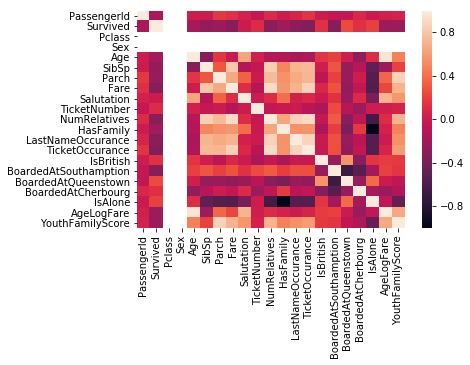

In [40]:
# xgb seems to be struggling with lower class men; lets try to see what we can do about that
df_poor_women = df[np.logical_and(df['Pclass'] == 0, df['Sex'] == 1)]
df_poor_women = df_poor_women.drop(labels=['CabinDeck', 'CabinNumber', 'Cabin',
                                       'TicketPrefix', 'TransformedCabinDeck',
                                       'Ticket'], axis=1)

sns.heatmap(df_poor_women.corr())
df_poor_women.shape

In [41]:
df_poor_women.corr()['Survived']

PassengerId             -0.152630
Survived                 1.000000
Pclass                        NaN
Sex                           NaN
Age                     -0.176617
SibSp                   -0.259351
Parch                   -0.242051
Fare                    -0.313682
Salutation               0.000000
TicketNumber             0.106677
NumRelatives            -0.312183
HasFamily               -0.197203
LastNameOccurance       -0.292628
TicketOccurance         -0.338008
IsBritish                0.139374
BoardedAtSouthamption   -0.313392
BoardedAtQueenstown      0.247841
BoardedAtCherbourg       0.132691
IsAlone                  0.197203
AgeLogFare              -0.221570
YouthFamilyScore        -0.225292
Name: Survived, dtype: float64

In [42]:
df_poor_women.dtypes

PassengerId                int64
Survived                   int64
Pclass                     int64
Sex                        int64
Age                      float64
SibSp                      int64
Parch                      int64
Fare                     float64
Salutation                 int64
TicketNumber             float64
NumRelatives               int64
HasFamily                   bool
LastNameOccurance          int64
TicketOccurance            int64
IsBritish                  int64
BoardedAtSouthamption      int64
BoardedAtQueenstown        int64
BoardedAtCherbourg         int64
IsAlone                    int64
AgeLogFare               float64
YouthFamilyScore         float64
dtype: object

In [48]:
def i_gen():
    for i in range(len(df_poor_women.columns)):
        yield i
        
ig = i_gen()

[print(next(ig), col) for col in df_poor_women.columns]
a=1

0 PassengerId
1 Survived
2 Pclass
3 Sex
4 Age
5 SibSp
6 Parch
7 Fare
8 Salutation
9 TicketNumber
10 NumRelatives
11 HasFamily
12 LastNameOccurance
13 TicketOccurance
14 IsBritish
15 BoardedAtSouthamption
16 BoardedAtQueenstown
17 BoardedAtCherbourg
18 IsAlone
19 AgeLogFare
20 YouthFamilyScore


In [49]:
from sklearn.preprocessing import StandardScaler

# maybe fare and age have something to do with it
df_poor_women = df_poor_women.dropna()
xs = list(df_poor_women['Age'])
ys = list(df_poor_women['Fare'])
xs = StandardScaler().fit_transform(np.array(xs).reshape(-1, 1))[:, 0]
ys = StandardScaler().fit_transform(np.array(ys).reshape(-1, 1))[:, 0]
zs = list(df_poor_women['IsBritish'])
encoding = list(df_poor_women['Survived'])

print(len(encoding))
print(sum(encoding))

xn = []
xp = []
yn = []
yp = []
zn = []
zp = []

list(map(lambda i: (xp.append(xs[i]), yp.append(ys[i]), zp.append(zs[i])) if encoding[i]
         else (xn.append(xs[i]), yn.append(ys[i]), zn.append(zs[i])),
         [i for i in range(len(encoding))]))

lived = go.Scatter3d(x=xp, y=yp, z=zp, mode='markers', name='lived')
died = go.Scatter3d(x=xn, y=yn, z=zn, mode='markers', name='died')

data = [lived, died]

py.iplot(data)
# maybe knn on some slice of old women?


102
47


In [50]:
df = df.drop(['Cabin', 'CabinNumber', 'CabinDeck', 'Ticket', 'TicketNumber', 'TicketPrefix'], axis=1)
# now that we have sucked some of that information dry lets let it go; this could be a place
# where we could extract more features and experiment; possible area for improvement

In [55]:
df.loc[:, 'HasFamily'] = df['HasFamily'].astype(int)

In [56]:
# try imputing Age via MICE
from fancyimpute import MICE

mice = MICE()
mat = mice.complete(df)
df.loc[:, 'Age'] = mat[:, 4]

[MICE] Completing matrix with shape (891, 21)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.010
[MICE] Starting imputation round 3/110, elapsed time 0.013
[MICE] Starting imputation round 4/110, elapsed time 0.015
[MICE] Starting imputation round 5/110, elapsed time 0.017
[MICE] Starting imputation round 6/110, elapsed time 0.019
[MICE] Starting imputation round 7/110, elapsed time 0.021
[MICE] Starting imputation round 8/110, elapsed time 0.023
[MICE] Starting imputation round 9/110, elapsed time 0.026
[MICE] Starting imputation round 10/110, elapsed time 0.031
[MICE] Starting imputation round 11/110, elapsed time 0.033
[MICE] Starting imputation round 12/110, elapsed time 0.038
[MICE] Starting imputation round 13/110, elapsed time 0.042
[MICE] Starting imputation round 14/110, elapsed time 0.044
[MICE] Starting imputation round 15/110, elapsed time 0.046
[MICE] Starting imputation round 16/110, elapsed time 0.048
[MI

In [58]:
full_df = df
df.to_csv('df_after_engineering.csv', index=False)

In [59]:
df.where(np.logical_and(df['Sex'] == 1, df['Pclass'] == 0)).count()

PassengerId              144
Survived                 144
Pclass                   144
Sex                      144
Age                      144
SibSp                    144
Parch                    144
Fare                     144
Salutation               144
NumRelatives             144
HasFamily                144
LastNameOccurance        144
TicketOccurance          144
IsBritish                144
TransformedCabinDeck       6
BoardedAtSouthamption    144
BoardedAtQueenstown      144
BoardedAtCherbourg       144
IsAlone                  144
AgeLogFare               102
YouthFamilyScore         102
dtype: int64

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

n_components = 2
pca = PCA(n_components=n_components)

# I'm struggling on classifying lowest class women; lets do some EDA on that


women_df = df.where(df['Sex'] == 1).dropna(subset=['Sex'])
poor_women_df = women_df.where(women_df['Pclass'] == 0).dropna(subset=['Pclass'])
poor_women_df = poor_women_df.drop('TransformedCabinDeck', axis=1)
print(poor_women_df.count())
poor_women_df = poor_women_df.dropna()
norm_mat = normalize(poor_women_df.drop('Survived', axis=1).values)
mat = pca.fit_transform(norm_mat)
print(mat.shape)
sum(pca.explained_variance_ratio_)

PassengerId              144
Survived                 144
Pclass                   144
Sex                      144
Age                      144
SibSp                    144
Parch                    144
Fare                     144
Salutation               144
NumRelatives             144
HasFamily                144
LastNameOccurance        144
TicketOccurance          144
IsBritish                144
BoardedAtSouthamption    144
BoardedAtQueenstown      144
BoardedAtCherbourg       144
IsAlone                  144
AgeLogFare               102
YouthFamilyScore         102
dtype: int64
(102, 2)


0.9381671690928373

In [61]:
mat_ = mat
mat.shape

(102, 2)

In [62]:
pos_rows = []
neg_rows = []

survived_array = np.array(df['Survived'])

from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics.pairwise import sigmoid_kernel

#rbf = RBF(length_scale=3)
mat = sigmoid_kernel(mat)

#mat = rbf(mat_)

for i in range(mat.shape[0]):
    if np.equal(survived_array[i], 1):
        pos_rows.append(mat[i, :])
    else:
        neg_rows.append(mat[i, :])
        
xp = []
yp = []
#zp = []
for row in pos_rows:
    xp.append(row[0])
    yp.append(row[1])
    #zp.append(row[2])
    
xn = []
yn = []
#zn = []
for row in neg_rows:
    xn.append(row[0])
    yn.append(row[1])
    #zn.append(row[2])


        
trace1 = go.Scatter(x=xp, y=yp, mode='markers', marker = dict(size=4, color='rgb(127, 127, 127)'))
trace2 = go.Scatter(x=xn, y=yn, mode='markers', marker=dict(size=4))

py.iplot([trace1, trace2])

In [ ]:
# it sits on a plane exactly, lets use pca to take a look at it

pca = PCA(n_components=2)
vals = pca.fit_transform(mat)
print(sum(pca.explained_variance_ratio_))

pos_rows = []
neg_rows = []

for i in range(vals.shape[0]):
    if np.equal(survived_array[i], 1):
        pos_rows.append(vals[i, :])
    else:
        neg_rows.append(vals[i, :])
        
xp = []
yp = []
for row in pos_rows:
    xp.append(row[0])
    yp.append(row[1])
    
xn = []
yn = []
for row in neg_rows:
    xn.append(row[0])
    yn.append(row[1])
    
trace1 = go.Scatter(x=xp, y=yp, mode='markers', marker=dict(size=5))
trace2 = go.Scatter(x=xn, y=yn, mode='markers', marker=dict(size=5))

py.iplot([trace1, trace2])

In [63]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Salutation', 'NumRelatives', 'HasFamily', 'LastNameOccurance',
       'TicketOccurance', 'IsBritish', 'TransformedCabinDeck',
       'BoardedAtSouthamption', 'BoardedAtQueenstown', 'BoardedAtCherbourg',
       'IsAlone', 'AgeLogFare', 'YouthFamilyScore'],
      dtype='object')

In [67]:
poor_women_df.corr()['Survived'].sort_values()

Fare                    -0.301907
TicketOccurance         -0.296082
LastNameOccurance       -0.254603
NumRelatives            -0.226879
YouthFamilyScore        -0.225292
AgeLogFare              -0.221570
SibSp                   -0.190607
BoardedAtSouthamption   -0.181410
Age                     -0.176617
Parch                   -0.170010
HasFamily               -0.141984
PassengerId             -0.090217
Salutation              -0.008656
IsBritish                0.010805
BoardedAtQueenstown      0.025938
IsAlone                  0.141984
BoardedAtCherbourg       0.196183
Survived                 1.000000
Pclass                        NaN
Sex                           NaN
Name: Survived, dtype: float64

# Easy Future Improvements

1. Splitting model based on whether Cabin is available or not
2. Explore ensemble models on subsets of the data
3. Explore family more
4. More careful handling of the _other_ classes (like Madamouselle or whatever; it might be the case that a lot of them are female, which is extremely valuable information (might get another ~1% if there's enough)
5. Race; bigotry might have been important in deciding who actually got a chance to live